In [1]:
#DL example using Keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [2]:
#- load data
def get_data(corr=False):
    white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
    red=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
    #- combine with a target varialbe
    white['type']=0.
    red['type']=1.
    wines = pd.concat([red,white],join='outer')
    
    #- check the correlation:
    if corr:
        import seaborn as sns 
        corr = wines.corr() 
        sns.heatmap(corr,  
                    xticklabels=corr.columns.values, 
                    yticklabels=corr.columns.values) 
        plt.show()    

    return wines

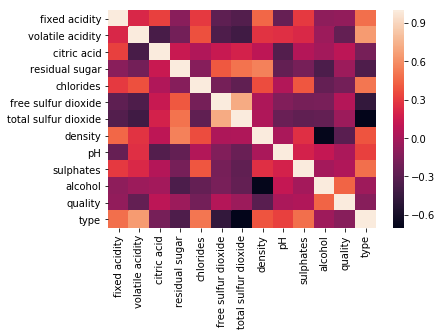

In [3]:
wine_data=get_data(corr=True)

In [4]:
#- train_test and scale

def train_test_data(dataDF):
    # Specify the data 
    X=dataDF.ix[:,0:-1]
    # Specify the target labels and flatten the array 
    y=np.ravel(dataDF.ix[:,-1])
    # Split the data up in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
    #- scale/normalization
    # Define the scaler 
    scaler = StandardScaler().fit(X_train)
    # Scale the train set
    X_train = scaler.transform(X_train)
    # Scale the test set
    X_test = scaler.transform(X_test)

    return X_train,X_test,y_train,y_test

In [5]:
def deep_learning_model_inst(inshape=11,hidshape=8):

    # Initialize the constructor
    model = Sequential()

    # Add an input layer 
    model.add(Dense(12, activation='relu', input_shape=(inshape,)))

    # Add one hidden layer 
    model.add(Dense(hidshape, activation='relu'))

    # Add an output layer 
    model.add(Dense(1, activation='sigmoid'))
    return model



In [6]:
def fit_model(model,XX_train,yy_train,epochs=5,loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']):
    model.compile(loss=loss,optimizer=optimizer,metrics=metrics)
    model.fit(XX_train,yy_train,epochs=epochs,batch_size=1,verbose=1)
    return model


def evaluate_model(model,XX_test,yy_test,round=False):
    y_pred = model.predict(XX_test)
    if round:
       y_pred=np.round(y_pred)
    score=model.evaluate(XX_test,yy_test,verbose=1)
    print(score)
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
    print("Confusion Matrix: ", confusion_matrix(yy_test, y_pred))
    print("Precision: ",precision_score(yy_test,y_pred))
    print("Recall: ",recall_score(yy_test,y_pred))
    print("F1 Score: ", f1_score(yy_test,y_pred))
    print("Cohen Kappa: ", cohen_kappa_score(yy_test, y_pred))
    return

In [7]:
def run_process_binary():
    wines=get_data()
    X_train, X_test, y_train, y_test = train_test_data(wines)
    mod=deep_learning_model_inst(inshape=12)
    modd=fit_model(mod,X_train,y_train,epochs=5)
    evaluate_model(modd,X_test,y_test,round=True)

In [8]:
#-Running Process
run_process_binary()

/Users/gd397w/softwares/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/gd397w/softwares/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/Users/gd397w/softwares/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/gd397w/softwares/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

Epoch 1/5
4352/4352 [==============================] - 3s 719us/step - loss: 0.0830 - accuracy: 0.9789
Epoch 2/5
4352/4352 [==============================] - 3s 658us/step - loss: 0.0238 - accuracy: 0.9952
Epoch 3/5
4352/4352 [==============================] - 3s 672us/step - loss: 0.0216 - accuracy: 0.9968
Epoch 4/5
4352/4352 [==============================] - 3s 667us/step - loss: 0.0202 - accuracy: 0.9963
Epoch 5/5
2145/2145 [==============================] - 0s 18us/step
[0.01732395325183851, 0.9962704181671143]
Confusion Matrix:  [[1603    1]
 [   7  534]]
Precision:  0.9981308411214953
Recall:  0.9870609981515711
F1 Score:  0.9925650557620816
Cohen Kappa:  0.9900760489257727


In [10]:
def run_process_regression(kfold=False,hidden_units=64,input_dim=12,optimizer='rmsprop',loss='mse',metrics=['mae']):
    #- use quality as the target
    wines=get_data()
    #wines=wines.drop('type',axis=1)
    if kfold:
        y=wines.quality.values
        X=wines.drop('quality',axis=1)
        seed = 123
        np.random.seed(seed)
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
        X=StandardScaler().fit_transform(X)
        for train, test in kfold.split(X, y):
            model = Sequential()
            model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))
            model.add(Dense(12, activation='relu')) #- Hidden
            model.add(Dense(1))
            model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
            model.fit(X[train], y[train], epochs=5, verbose=1) 
            y_pred=model.predict(X[test])
            mse_value, mae_value = model.evaluate(X[test], y[test], verbose=0)
            print("MSE: ", mse_value)
            print("MAE: ", mae_value)
            print("R2 Score: ",r2_score(y[test], y_pred))
        
    else:
        #- reorder the columns
        wines=wines[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'type','quality']]
        X_train, X_test, y_train, y_test = train_test_data(wines)
        mod=Sequential()
        mod.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))
        mod.add(Dense(12, activation='relu'))
        mod.add(Dense(1))
        modd=fit_model(mod,X_train,y_train,epochs=5,optimizer=optimizer,loss=loss, metrics=metrics)
        #evaluate_model(modd,X_test,y_test)
        y_pred=modd.predict(X_test)
        mse_value, mae_value = modd.evaluate(X_test, y_test, verbose=0)
        print("MSE: ", mse_value)
        print("MAE: ", mae_value)
        print("R2 Score: ",r2_score(y_test, y_pred))
    return

In [11]:
#- run regress model
run_process_regression()

/Users/gd397w/softwares/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/gd397w/softwares/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


Epoch 1/5
4352/4352 [==============================] - 3s 664us/step - loss: 1.6172 - mae: 0.8666 3s - loss: 5. - ETA: 1s 
Epoch 2/5
4352/4352 [==============================] - 3s 623us/step - loss: 0.6058 - mae: 0.6031
Epoch 3/5
4352/4352 [==============================] - 3s 600us/step - loss: 0.5697 - mae: 0.5895
Epoch 4/5
4352/4352 [==============================] - 3s 593us/step - loss: 0.5448 - mae: 0.5741
Epoch 5/5
4352/4352 [==============================] - 3s 618us/step - loss: 0.5313 - mae: 0.5671 1s - loss: 0.5223 - mae: 0.559 - 
MSE:  0.5043242851337353
MAE:  0.5446226000785828
R2 Score:  0.34108875896565316


In [12]:
#use cross validation
run_process_regression(kfold=True)

Epoch 1/5
5195/5195 [==============================] - 0s 37us/step - loss: 13.6062 - mae: 3.1452
Epoch 2/5
5195/5195 [==============================] - 0s 23us/step - loss: 1.2297 - mae: 0.8614
Epoch 3/5
5195/5195 [==============================] - 0s 23us/step - loss: 0.8387 - mae: 0.7057
Epoch 4/5
5195/5195 [==============================] - 0s 23us/step - loss: 0.6722 - mae: 0.6333
Epoch 5/5
5195/5195 [==============================] - 0s 23us/step - loss: 0.5873 - mae: 0.5916
MSE:  0.6013093615915003
MAE:  0.5919342041015625
R2 Score:  0.2138400653402489
Epoch 1/5
5197/5197 [==============================] - 0s 38us/step - loss: 6.4636 - mae: 1.9541
Epoch 2/5
5197/5197 [==============================] - 0s 24us/step - loss: 1.0451 - mae: 0.7854
Epoch 3/5
5197/5197 [==============================] - 0s 23us/step - loss: 0.7176 - mae: 0.6525
Epoch 4/5
5197/5197 [==============================] - 0s 23us/step - loss: 0.5894 - mae: 0.5977
Epoch 5/5
5197/5197 [=========================

In [13]:
#- other optimizer:rmsprop
from keras.optimizers import SGD, RMSprop
sgd=SGD(lr=0.1)
rmsprop=RMSprop(lr=0.01)
run_process_regression(optimizer=rmsprop)

/Users/gd397w/softwares/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/gd397w/softwares/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


Epoch 1/5
4352/4352 [==============================] - 3s 616us/step - loss: 1.1122 - mae: 0.7855
Epoch 2/5
4352/4352 [==============================] - 3s 615us/step - loss: 0.6626 - mae: 0.6294
Epoch 3/5
4352/4352 [==============================] - 3s 604us/step - loss: 0.5936 - mae: 0.6034
Epoch 4/5
4352/4352 [==============================] - 3s 603us/step - loss: 0.5660 - mae: 0.5857
Epoch 5/5
4352/4352 [==============================] - 3s 612us/step - loss: 0.5557 - mae: 0.5847
MSE:  0.5595537681332279
MAE:  0.586737871170044
R2 Score:  0.2689301760330228


In [14]:
# using stochastic gradient decent
run_process_regression(optimizer=sgd)

/Users/gd397w/softwares/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/gd397w/softwares/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


Epoch 1/5
4352/4352 [==============================] - 2s 546us/step - loss: 1.2522 - mae: 0.7476
Epoch 2/5
4352/4352 [==============================] - 2s 555us/step - loss: 0.8420 - mae: 0.7251
Epoch 3/5
4352/4352 [==============================] - 2s 572us/step - loss: 0.8476 - mae: 0.7261
Epoch 4/5
4352/4352 [==============================] - 2s 545us/step - loss: 0.8523 - mae: 0.7262
Epoch 5/5
4352/4352 [==============================] - 2s 548us/step - loss: 0.8447 - mae: 0.7251
MSE:  0.93740764241188
MAE:  0.7765613198280334
R2 Score:  -0.22474456263081577
